# Types of unsupervise learning

* transformation
* clustering

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

In [73]:
# load breast cancer dataset
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)
x = plt.scatter(X_train[:,0], X_train[:,1], c= y_train)

# Principal Component Analysis (PCA)

In [87]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
x_train = pd.DataFrame(X_train[:,:2], columns=['col1', 'col2'])

pca = PCA()
pca.fit(X_train[:,:2])
x_train_pca = pca.transform(X_train[:,:2])
df = pd.DataFrame(x_train_pca, columns=['col1', 'col2'])
df['col3'] = 0

pca = PCA(n_components=1)
pca.fit(X_train)
x_train_pca_inv = pca.inverse_transform(pca.transform(X_train))
df1 = pd.DataFrame(x_train_pca_inv[:, :2], columns=['col1', 'col2'])

In [94]:
fig, ax = plt.subplots(2,2, figsize=(15, 8))
sns.regplot('col1', 'col2', data = x_train, ax= ax[0,0])
ax[0,0].set_title(" Original data")
sns.regplot('col1', 'col2', data = df, ax= ax[0,1])
ax[0,1].set_title("Transformed data")
sns.regplot('col1', 'col3', data = df, ax= ax[1,0],  fit_reg=False, scatter_kws=)
ax[1,0].set_title("Transformed data with second component dropped")
sns.regplot('col1', 'col2', data = df1, ax= ax[1,1],  fit_reg=False)
x =ax[1,1].set_title("Back-rotation using only first component")

### uncorrelate new features

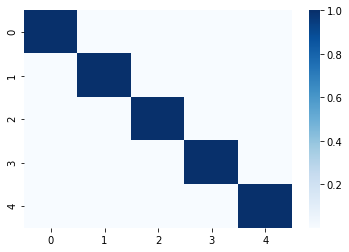

In [68]:
pca = PCA()
pca.fit(X_train[:, :5])
x = pca.transform(X_train[:, :5])
x1 = pd.DataFrame(x)
x1 = sns.heatmap(abs(x1.corr()), cmap='Blues')

### Eigenfaces for feature extraction

In [100]:
photos = np.load('X_train.npy')
labels = np.load('y_train.npy')

### Printing first 10 photos

In [12]:
fig, ax = plt.subplots(2, 5, figsize=(10,5))
i= 0 
for x,y in zip(photos[0:10], labels[:100]):
    x1=ax.ravel()[i].imshow(x.reshape((50,37)),cmap= matplotlib.cm.binary_r)
    x1=ax.ravel()[i].set_axis_off()
    x1=ax.ravel()[i].set_title(y)
    i +=1

In [101]:
# frequence of each class
pd.Series(labels).value_counts()

3    395
1    183
6    106
4     86
2     85
5     60
0     51
dtype: int64

#### spliting train and test set

In [103]:
X_train, X_test, y_train, y_test = train_test_split(photos, labels, stratify=labels, test_size=0.03, random_state=42)

### classification using KNNClassifier

In [105]:
from sklearn.neighbors import KNeighborsClassifier

#### 1) knnClassifier without PCA

In [16]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.52


#### 2) knnClassifier with PCA n_components = 100

In [106]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)

x_train1 = pca.transform(X_train)
x_test1 = pca.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train1, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(x_test1, y_test)))

Test set score of 1-nn: 0.79


In [20]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 1850)


##### Plotting 10_components 

In [22]:
fig, ax = plt.subplots(2, 5, figsize=(10,5))
i= 0 
for x in pca.components_[:10]:
    x1=ax.ravel()[i].imshow(x.reshape((50,37)))
    x1=ax.ravel()[i].set_axis_off()
    x1=ax.ravel()[i].set_title('{}. component'.format((i+1)))
    i +=1

##### plotting images with diffierent n_components=['origin', 10, 100, 500]

In [107]:
def plot_image(n_components):
    pca = PCA(n_components=n_components).fit(X_train)
    x_pca = pca.transform(X_train)
    x_inv = pca.inverse_transform(x_pca)
    return x_inv

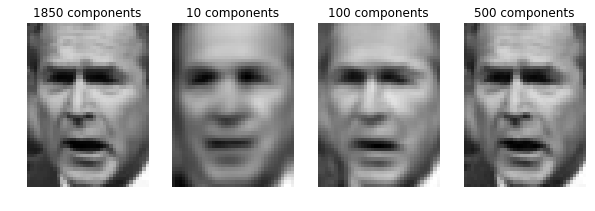

In [108]:
fig, ax = plt.subplots(1, 4, figsize=(10,5))
j= 0
for i in [1850, 10, 100, 500]:
    x = plot_image(i)
    x1=ax.ravel()[j].imshow(x[0].reshape((50,37)), cmap= matplotlib.cm.binary_r)
    x1=ax.ravel()[j].set_axis_off()
    x1=ax.ravel()[j].set_title('{} components'.format(i))
    j +=1


# Non-Negative Matrix Factorization (NMF)1

In [109]:
from sklearn.decomposition import NMF

In [116]:
# generating dataset
rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))

X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2) + 8

In [117]:
nmf = NMF(random_state=0)
nmf.fit(X_blob)
X_nmf = nmf.transform(X_blob)

In [118]:
nmf1 = NMF(random_state=0, n_components=1)
nmf1.fit(X_blob)
X_nmf1 = nmf.transform(X_blob)

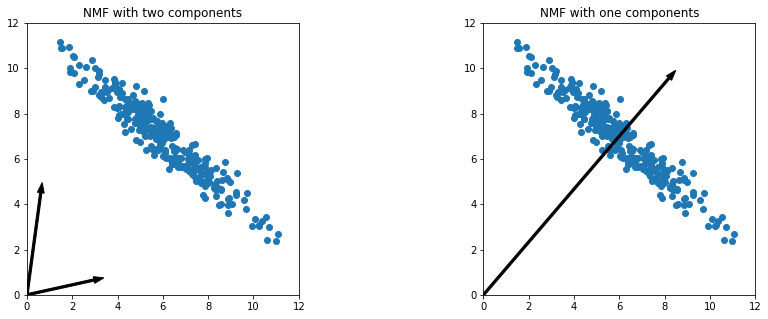

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].scatter(X_blob[:, 0], X_blob[:, 1])
ax[0].arrow(0,0, nmf.components_[0, 0], nmf.components_[0, 1], width=.1,
                  head_width=.3, color='k')
ax[0].arrow(0,0, nmf.components_[1, 0], nmf.components_[1, 1], width=.1,
                  head_width=.3, color='k')
ax[0].set_xlim(0, 12)
ax[0].set_ylim(0, 12)
ax[0].set_aspect('equal')
ax[0].set_title("NMF with two components")

ax[1].scatter(X_blob[:, 0], X_blob[:, 1])
ax[1].arrow(0,0, nmf1.components_[0, 0], nmf1.components_[0, 1], width=.1,
                  head_width=.3, color='k')
ax[1].set_xlim(0, 12)
ax[1].set_ylim(0, 12)
ax[1].set_aspect('equal')
x =ax[1].set_title("NMF with one components")

#### Reconstructing  face images using increasing numbers of components found by NMF

In [121]:
def plot_image_nmf(n_components):
    nmf = NMF(n_components=n_components, random_state=0)
    nmf.fit(X_train)
    X_train_tra = nmf.transform(X_train[:1])
    X_train_back = np.dot(X_train_tra, nmf.components_)
    return X_train_back

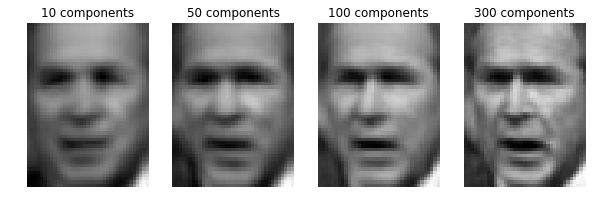

In [122]:
fig, ax = plt.subplots(1, 4, figsize=(10,5))
j= 0
for i in [10, 50, 100, 300]:
    x = print_image_nmf(i)
    x1=ax.ravel()[j].imshow(x[0].reshape((50,37)), cmap= matplotlib.cm.binary_r)
    x1=ax.ravel()[j].set_axis_off()
    x1=ax.ravel()[j].set_title('{} components'.format(i))
    j +=1

#### The components found by NMF on the faces dataset when using 15 components

In [123]:
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)

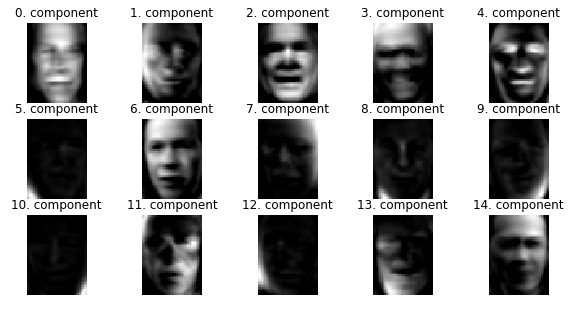

In [125]:
fig, ax = plt.subplots(3, 5, figsize=(10,5))
for i, x in enumerate(nmf.components_):
    x1=ax.ravel()[i].imshow(x.reshape((50,37)), cmap= matplotlib.cm.binary_r)
    x1=ax.ravel()[i].set_axis_off()
    x1=ax.ravel()[i].set_title('{}. component'.format((i)))

##### Faces that have a large coefficient for component 6

In [35]:
compn = 6
inds = np.argsort(X_train_nmf[:, compn])[::-1]

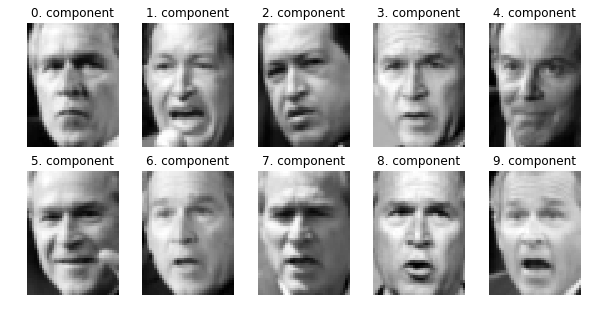

In [36]:
fig, ax = plt.subplots(2, 5, figsize=(10,5))
for i, x in enumerate(inds[:10]):
    x1=ax.ravel()[i].imshow(X_train[x].reshape((50,37)),cmap= matplotlib.cm.binary_r)
    x1=ax.ravel()[i].set_axis_off()
    x1=ax.ravel()[i].set_title('{}. component'.format((i)))

In [127]:
def make_signals():
    # fix a random state seed
    rng = np.random.RandomState(42)
    n_samples = 2000
    time = np.linspace(0, 8, n_samples)
    # create three signals
    s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
    s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
    s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

    # concatenate the signals, add noise
    S = np.c_[s1, s2, s3]
    S += 0.2 * rng.normal(size=S.shape)

    S /= S.std(axis=0)  # Standardize data
    S -= S.min()
    return S

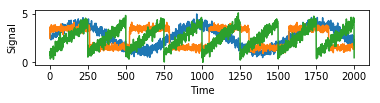

In [128]:
from scipy import signal
S = make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
x = plt.ylabel("Signal")

In [129]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [130]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


In [131]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

In [132]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
 'True sources',
 'NMF recovered signals',
 'PCA recovered signals']

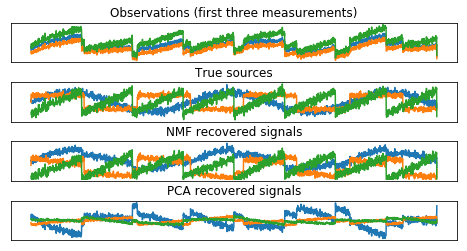

In [134]:
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
 subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

# Manifold Learning with t-SNE

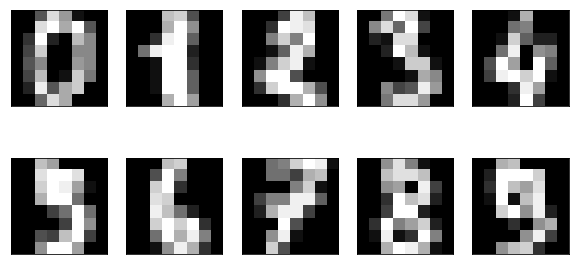

In [45]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
 subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img, cmap = matplotlib.cm.binary_r)

#### Build a PCA model

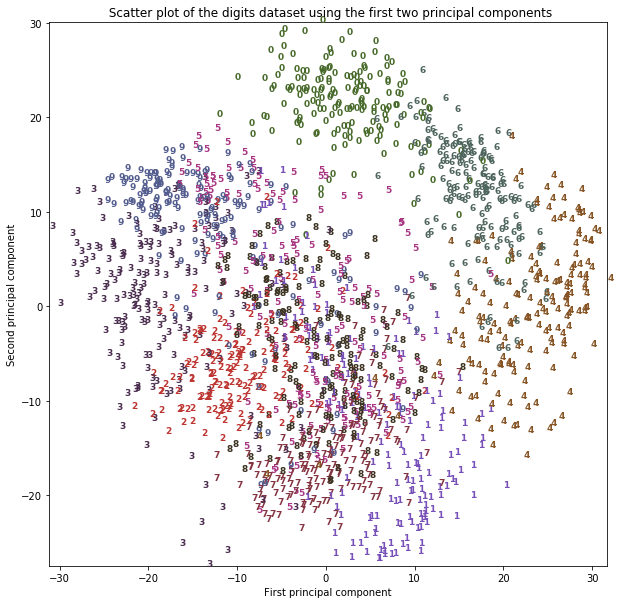

In [136]:
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
x = plt.title(' Scatter plot of the digits dataset using the first two principal components')

#### Build a t-SNE model

In [47]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

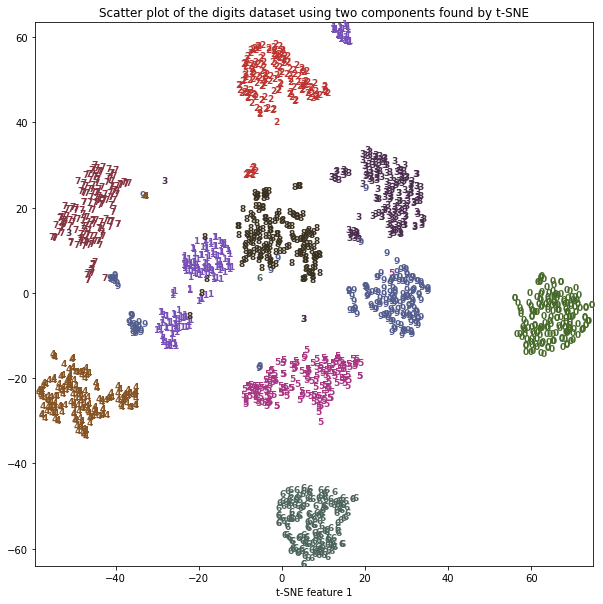

In [138]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")
x = plt.title('Scatter plot of the digits dataset using two components found by t-SNE')

# Clustering with Kmean

In [154]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [155]:
def plot_decision(model, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X1 = np.c_[x0.ravel(), x1.ravel()]
    y_pred = model.predict(X1).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, alpha=0.3)

#### Cluster centers and cluster boundaries found by the k-means algorithm with different cluster.

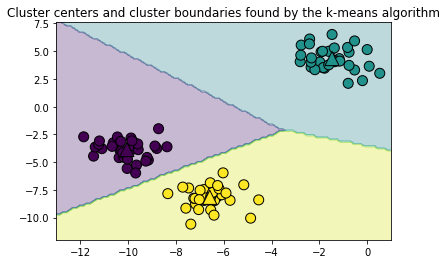

In [156]:
plot_decision(kmeans, [-13,1,-12,7.6])
plt.scatter(X[:,0], X[:,1], c= kmeans.labels_, s=100, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                     marker = '^', c = [0, 1, 2],  edgecolors='k', s=200)
x =plt.title('Cluster centers and cluster boundaries found by the k-means algorithm')

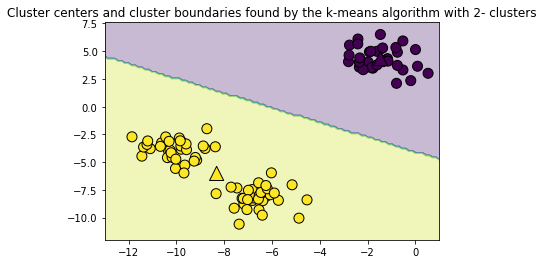

In [157]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
plot_predictions(kmeans, [-13,1,-12,7.6])
plt.scatter(X[:,0], X[:,1], c= kmeans.labels_, s=100, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                     marker = '^', c = [0, 1],  edgecolors='k', s=200)
x =plt.title('Cluster centers and cluster boundaries found by the k-means algorithm with 2- clusters')

In [158]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
plot_predictions(kmeans, [-13,1,-12,7.6])
plt.scatter(X[:,0], X[:,1], c= kmeans.labels_, s=100, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                     marker = '^', c = [0, 1,2,3,4],  edgecolors='k', s=200)
x =plt.title('Cluster centers and cluster boundaries found by the k-means algorithm with 5- clusters')

#### Cluster assignments found by k-means when clusters have different densities

In [99]:
X, y = make_blobs(n_samples=200, cluster_std=[1.0, 2.5, 0.5], random_state=170)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
plot_predictions(kmeans, [-13,4,-12,7.6])
plt.scatter(X[:,0], X[:,1],c= kmeans.labels_,  s=100, edgecolors='k')
x =plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                     marker = '^', c = [0, 1,2],  edgecolors='k', s=200)

 #### k-means fails to identify nonspherical clusters

In [55]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

In [56]:
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

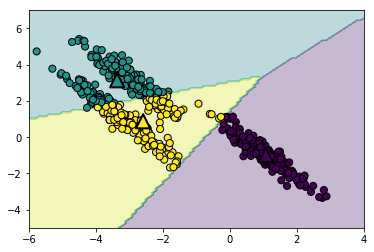

In [57]:
plot_predictions(kmeans, [-6,4,-5,7])
plt.scatter(X[:,0], X[:,1], c= kmeans.labels_, edgecolors='k', s=50)
x =plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                     marker = '^', c = [0, 1,2],linewidth=2,  edgecolors='k', s=200)

#### k-means fails to identify clusters with complex shapes

In [58]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [59]:
plot_predictions(kmeans, [-1.5,2.5,-1,1.5])
plt.scatter(X[:,0], X[:,1], c= kmeans.labels_, edgecolors='k', s=50)
x =plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                     marker = '^', c = [0, 1],linewidth=2,  edgecolors='k', s=200)

#### Using many k-means clusters to cover the variation in a complex dataset

In [60]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)

In [61]:
plot_predictions(kmeans, [-1.5,2.5,-1,1.5])
plt.scatter(X[:,0], X[:,1], c= kmeans.labels_, edgecolors='k', s=50)
x =plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                     marker = '^',linewidth=2, color='k', edgecolors='k', s=100)

#### Vector quantization, or seeing k-means as decomposition

In [159]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, test_size=0.03, random_state=42)

In [161]:
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=100, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [162]:
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)

####  Comparing k-means cluster centers to components found by PCA and NMF

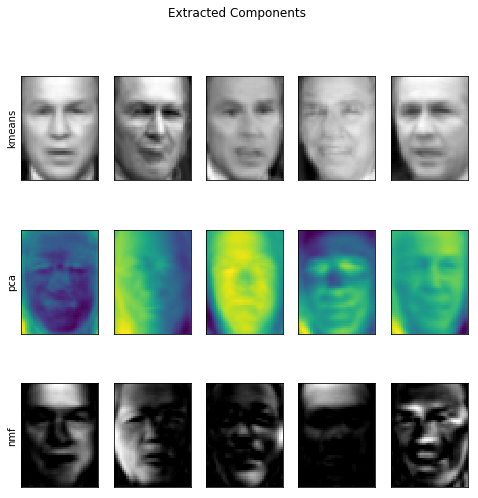

In [163]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
image_shape= (50,37)
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
    axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape), cmap = matplotlib.cm.binary_r)
    ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
    ax[2].imshow(comp_nmf.reshape(image_shape), cmap = matplotlib.cm.binary_r)
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
x =axes[2, 0].set_ylabel("nmf")

#### Comparing image reconstructions using k-means, PCA, and NMF with 100 components (or cluster centers)—k-means uses only a single cluster center per image

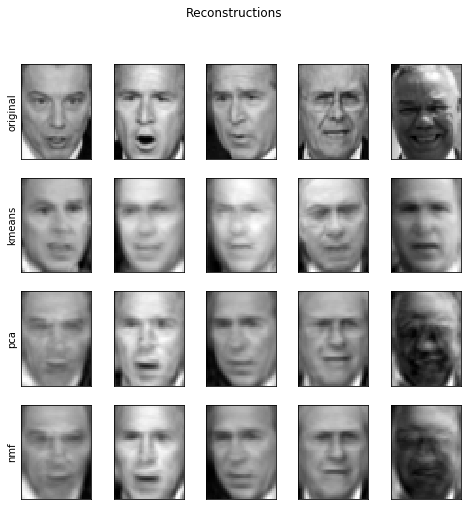

In [164]:
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},
                         figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
    axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
    X_reconstructed_nmf):
    ax[0].imshow(orig.reshape(image_shape), cmap = matplotlib.cm.binary_r)
    ax[1].imshow(rec_kmeans.reshape(image_shape), cmap = matplotlib.cm.binary_r)
    ax[2].imshow(rec_pca.reshape(image_shape), cmap = matplotlib.cm.binary_r)
    ax[3].imshow(rec_nmf.reshape(image_shape), cmap = matplotlib.cm.binary_r)
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
x = axes[3, 0].set_ylabel("nmf")